In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 

data=pd.read_csv('data.csv')
data.head()

def select_MinPts(data,k):
    k_dist = []
    data_array = data.values  # 将data转换为二维数组
    for i in range(data_array.shape[0]):
        dist = (((data_array[i] - data_array)**2).sum(axis=1)**0.5)
        dist.sort()
        k_dist.append(dist[k])
    return np.array(k_dist)

k = 19  # 此处k取 2*10 -1 
k_dist = select_MinPts(data,k)
k_dist.sort()
plt.plot(np.arange(len(k_dist)),k_dist[::-1])

eps = k_dist[::-1][15]
plt.scatter(15,eps,color="r")
plt.plot([0,15],[eps,eps],linestyle="--",color = "r")
plt.plot([15,15],[0,eps],linestyle="--",color = "r")

plt.xlim(0, len(k_dist))  # 设置x轴范围
plt.ylim(0, max(k_dist))  # 设置y轴范围
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Assuming X_scaled contains your standardized feature matrix

# Calculate the distances of each point to its k-nearest neighbors
k = 4  # You can adjust the value of k as needed
nbrs = NearestNeighbors(n_neighbors=k+1).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Sort the distances and plot them
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to {}th nearest neighbor'.format(k))
plt.title('k-distance Graph')
plt.show()


In [41]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming you have your DataFrame named 'df'
# You might need to preprocess your data and select the features you want to use for clustering

# For example, selecting columns 'feature1' and 'feature2' for clustering
df=pd.read_csv("data.csv")
print(df.columns)
selected_features=['面积', '周长', '暴雨', '比降', '断层', '岩性', '最大高程', '最小高程', '相对高差', '主沟长度']
X = df[selected_features]
print(X)
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

# Initialize DBSCAN
# You need to set the epsilon (eps) and minimum samples (min_samples) parameters
# These parameters might require tuning based on your data
eps = 1.6
min_samples =20
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model
dbscan.fit(X_scaled)

# Get cluster labels
cluster_labels = dbscan.labels_

# Add cluster labels to the DataFrame
X['cluster'] = cluster_labels
print(X)

Index(['ID', '面积', '周长', '暴雨', '比降', '断层', '岩性', '最大高程', '最小高程', '相对高差',
       '主沟长度'],
      dtype='object')
            面积     周长  暴雨    比降  断层    岩性  最大高程  最小高程   相对高差  主沟长度
0     65924920  37022  58  0.79   1  4380  1557  2823  12031   235
1     30245122  26890  57  0.79   1  4520  1557  2963  10973   270
2     45788150  31986  57  0.85   2  4640  1549  3091  11612   266
3    105370617  50908  72  0.78   3  5120  1620  3500  17338   202
4     10352295  14824  62  0.85   1  4220  1561  2659   5731   464
..         ...    ...  ..   ...  ..   ...   ...   ...    ...   ...
195   29774013  28883  88  0.82   0  2260   658  1602  10619   151
196   35432134  27258  68  0.79   1  2293   658  1635   9994   164
197   16602244  27193  68  0.80   0  2180   658  1522  10555   144
198   13953579  19401  72  0.78   3  2368   659  1709   6507   263
199   13371995  20438  72  0.84   3  2501   659  1842   8051   229

[200 rows x 10 columns]
[[ 0.60966461  0.79796692 -3.13711823 ...  0.85108499  0.478

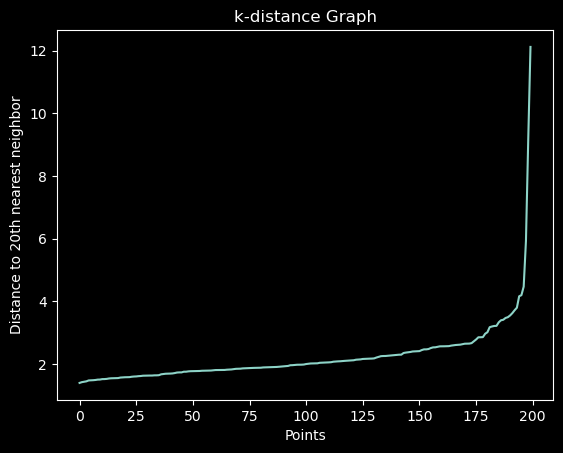

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
k = 20  # You can adjust the value of k as needed
nbrs = NearestNeighbors(n_neighbors=k+1).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Sort the distances and plot them
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to {}th nearest neighbor'.format(k))
plt.title('k-distance Graph')
plt.show()

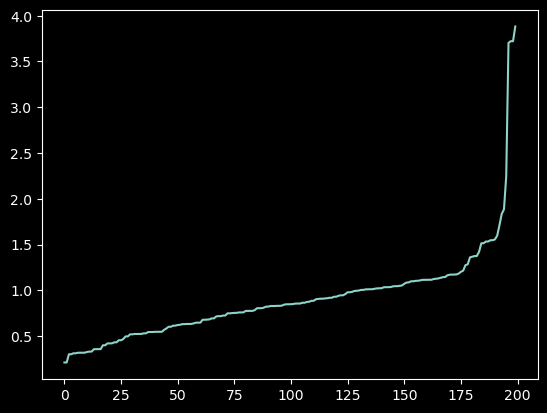

In [40]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)